In [96]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib notebook

In [97]:
def parse_gpustat_file(path):
    gpus = [str(i) for i in range(8)]
    data = [[] for i in range(8)]
    with open(path, "r") as f:
        for i, line in enumerate(f):
            if line[1] in gpus:
                gpu_id = int(line[1])
                gpu_util = int(line.split()[5])
                data[gpu_id].append(gpu_util)
    return data

In [98]:
path = os.path.join("jobs/output/candle_attn-DMBS-async-qUCB-qUCB-1-32-10800-42", "gpustat.txt")
data = parse_gpustat_file(path)

In [99]:
data = np.asarray(data)

mean_util = data.mean(axis=0)
std_util = data.std(axis=0)

<IPython.core.display.Javascript object>


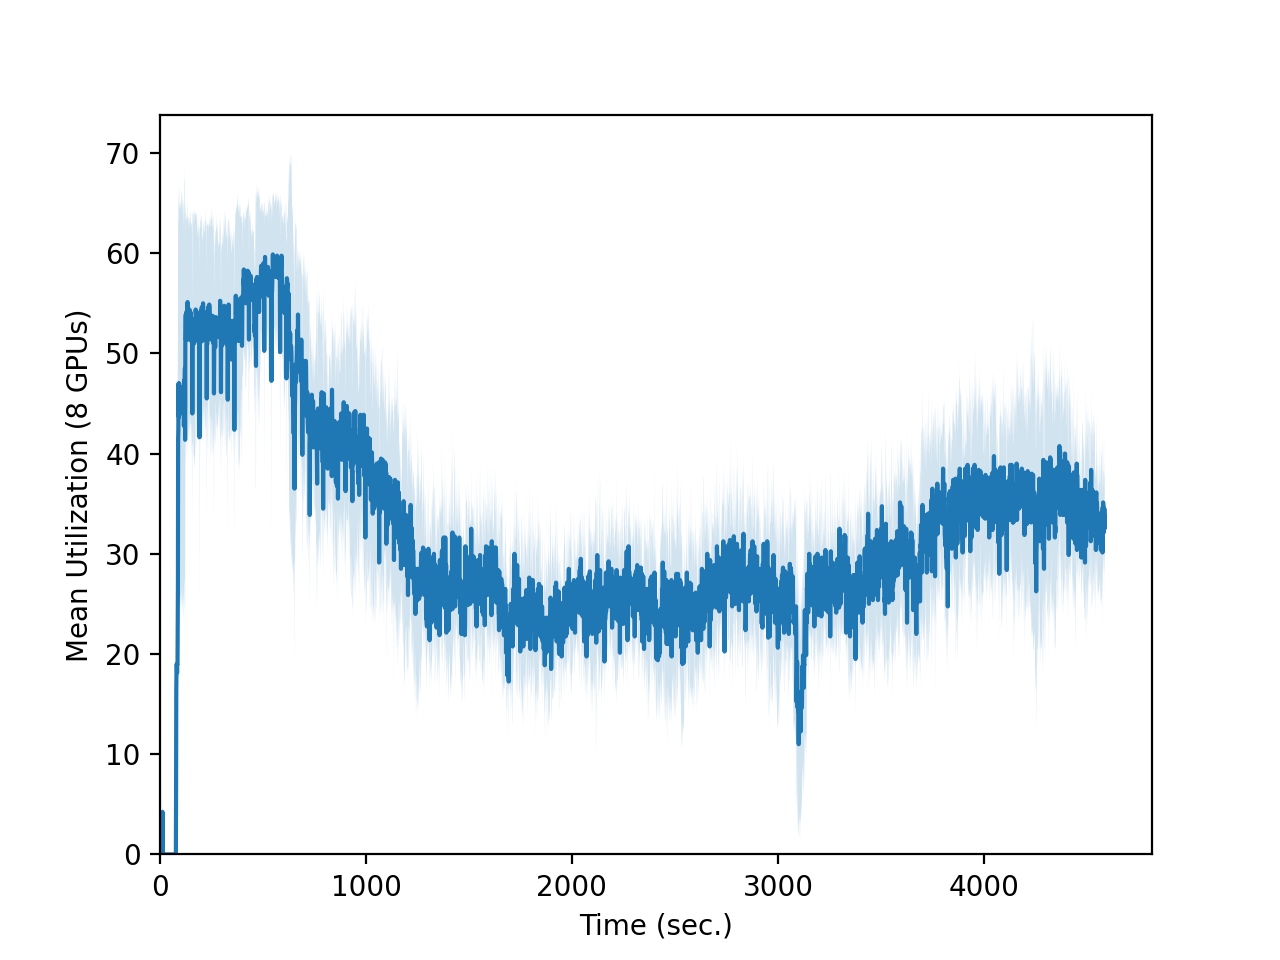

In [100]:
plt.figure()
plt.plot(mean_util)
plt.fill_between(list(range(std_util.shape[0])), y1=mean_util+std_util, y2=mean_util-std_util, alpha=0.2)
plt.ylabel("Mean Utilization (8 GPUs)")
plt.xlabel("Time (sec.)")
plt.xlim(0)
plt.ylim(0)
plt.show()

In [101]:
48*8

384

In [102]:
path = os.path.join("jobs/output/candle_attn-DMBS-async-qUCB-qUCB-1-32-10800-42", "results.csv")
df = pd.read_csv(path, index_col=0)

In [103]:
df = df.sort_values("timestamp_end")
df["num_model"] = 1

<IPython.core.display.Javascript object>


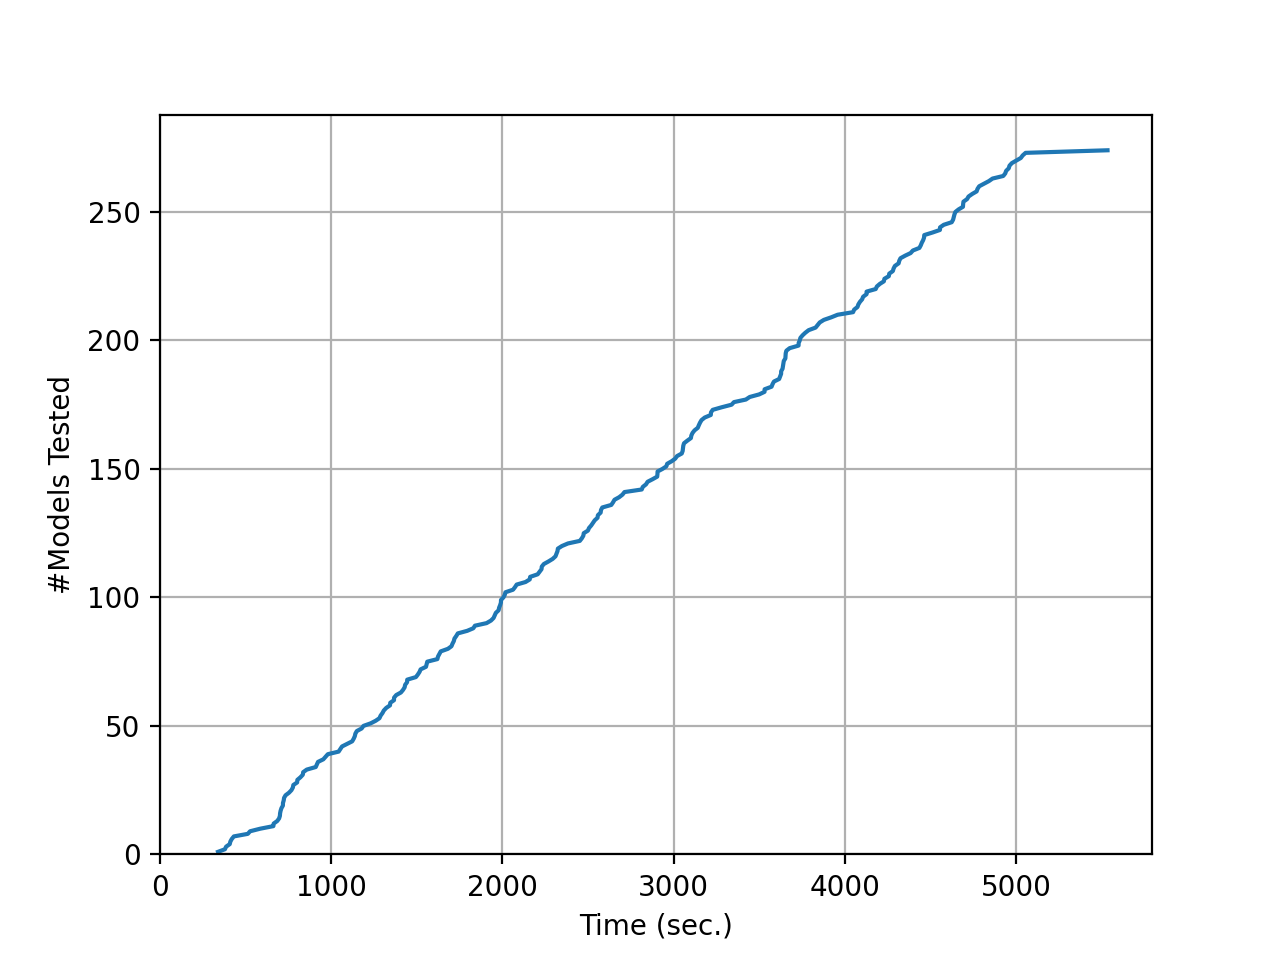

In [104]:
plt.figure()

plt.plot(df["timestamp_end"], df["num_model"].cumsum())

plt.xlabel("Time (sec.)")
plt.ylabel("#Models Tested")
plt.xlim(0)
plt.ylim(0)
plt.grid()
plt.show()